## Take a look at the data and plot some graphs. The files made in Preprocesser.py are not used as only basic preprocessing is required

In [1]:
import pandas as pd
%matplotlib inline

# Load the data 
df_repair = pd.read_csv('./data/RepairTrain.csv')
df_sale = pd.read_csv('./data/SaleTrain.csv')
df_sample = pd.read_csv('./data/SampleSubmission.csv')
df_mapping = pd.read_csv('./data/Output_TargetID_Mapping.csv')

# Basic proprocessing
df_repair['item_id'] = df_repair['module_category']+df_repair['component_category']
df_mapping['item_id'] = df_mapping['module_category']+df_mapping['component_category']
df_sale['item_id'] = df_sale['module_category']+df_sale['component_category']
df_repair['year/month(sale)'] = pd.to_datetime(df_repair['year/month(sale)'],format='%Y/%m')
df_repair['year/month(repair)'] = pd.to_datetime(df_repair['year/month(repair)'],format='%Y/%m')

# Time difference between sale and repair
df_repair['timediff'] = (df_repair['year/month(repair)'] - df_repair['year/month(sale)']).astype('timedelta64[M]')

## Item repair frequency

In [55]:
print "Number of repairs per item:\n"  
print "Mean:               ", int(df_repair.groupby('item_id').number_repair.sum().mean())
print "Standard deviation: " , int(df_repair.groupby('item_id').number_repair.sum().std())
print "Sum:                ", df_repair.number_repair.sum()

Number of repairs per item:

Mean:                2405
Standard deviation:  4813
Sum:                 538787


In [71]:
print "Most repaired components: "
print df_repair.groupby('item_id').number_repair.sum().sort_values(ascending=False).head()

Most repaired components: 
item_id
M2P24    38513
M2P16    30027
M6P24    21045
M2P20    20616
M3P12    20453
Name: number_repair, dtype: int64


### Over half of all repairs are on the same 20 components (224 components total)

In [70]:
print df_repair.groupby('item_id').number_repair.sum().sort_values(ascending=False).head(20).sum() \
        / float(df_repair.number_repair.sum())

0.557702765657


### And the 100 least frequently repaired components only account for 3% of repairs

In [77]:
print df_repair.groupby('item_id').number_repair.sum().sort_values(ascending=False).tail(100).sum() \
        / float(df_repair.number_repair.sum())

0.0311663050519


## Repairs over time, all sales over time, repaired sales over time 

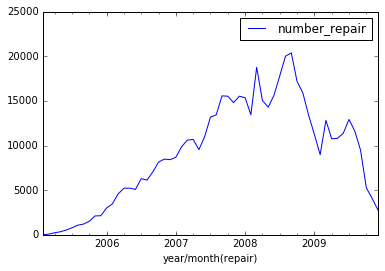

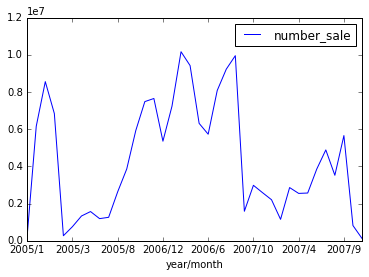

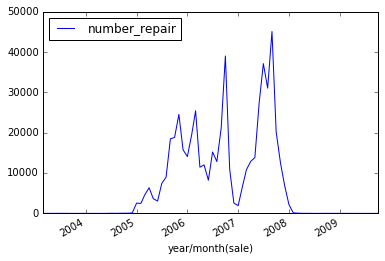

In [73]:
df_repair[['year/month(repair)','number_repair']].groupby('year/month(repair)').sum().plot()
df_sale[['year/month','number_sale']].groupby('year/month').sum().plot()
df_repair[['year/month(sale)','number_repair']].groupby('year/month(sale)').sum().plot()

## Time difference between purchase and repair 

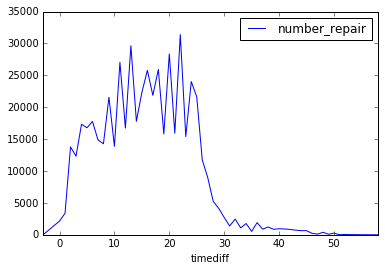

In [74]:
df_repair[['timediff','number_repair']].groupby('timediff').sum().plot()